In [ ]:
#Libraries imported for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries imported for visualization
import seaborn as sns

In [108]:
#Read CSV for data processing
df_seattle = pd.read_csv('..\data\seattle_weather.csv')
df_kona = pd.read_csv('..\data\kona_weather.csv')

In [109]:
#Print the shape and common columns
print(df_kona.shape)
df_kona.columns

print(df_seattle.shape)
df_seattle.columns

(1791, 40)
(1826, 30)


Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [ ]:
#Melt CSVs into tidy dataframe
df = df_kona[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on = 'DATE', how = 'outer')

df = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')
df.loc[df['city'] == 'PRCP_x', 'city'] = 'KONA'
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [73]:
#Rename DATE column to date
df = df.rename(columns={'DATE':'date'})

#Update date column to date type
df['date'] = pd.to_datetime(df['date'])

#Verify changes took effect
df

,date,city,precipitation,day_of_year
0,2018-01-01,KONA,0.00,1
1,2019-01-01,KONA,0.00,1
2,2020-01-01,KONA,0.00,1
3,2021-01-01,KONA,0.00,1
4,2022-01-01,KONA,0.00,1
...,...,...,...,...
3647,2018-09-09,SEA,0.13,252
3648,2019-09-09,SEA,0.29,252
3649,2020-09-09,SEA,0.00,253
3650,2021-09-09,SEA,0.00,252


In [ ]:
#Check the number of NA values per city
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()
##df.loc[df['city'] == 'KONA', 'precipitation'].isna().sum()

np.int64(49)

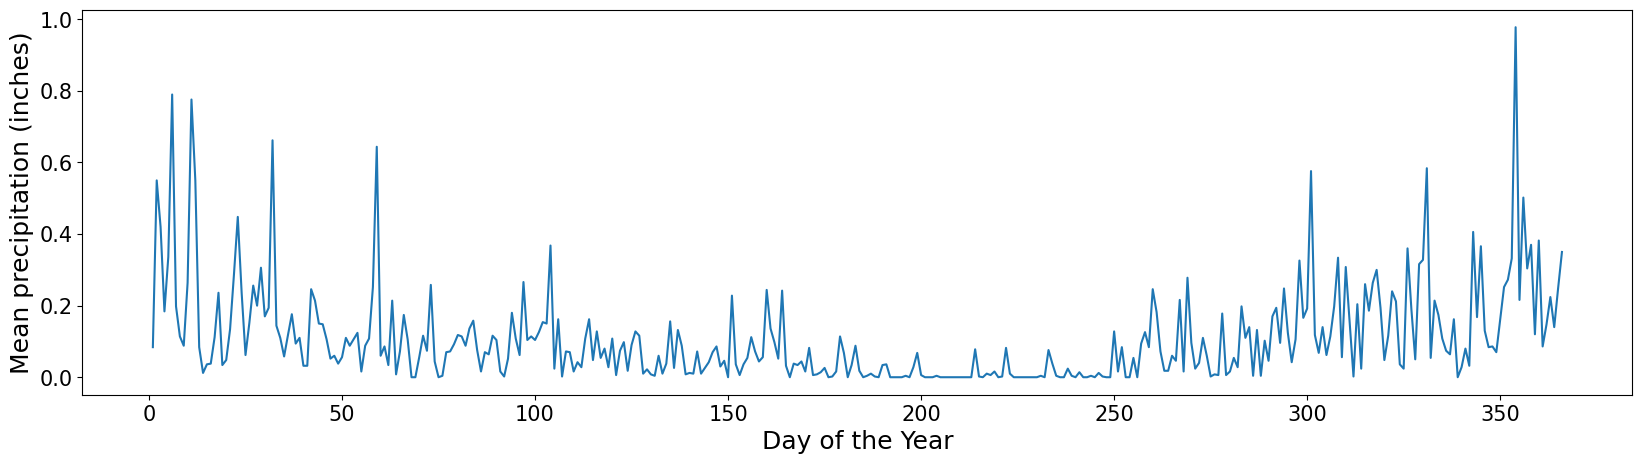

In [ ]:
#Compute column to determine the day within date column
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

#Calculate a mean of precipitation values per year for Seattle
mean_day_precip = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

#Plot the figure including mean
plt.figure(figsize=(20,5))
sns.lineplot(data=mean_day_precip, x='day_of_year', y='precipitation')
plt.xlabel('Day of the Year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)
plt.show()

The above graph shows the average precipitation for both cities for each day of the year. This trend is visualized to show the variation in rain and snowfall by season.

In [ ]:
#Create an index of days with precipitation
indices = np.where(df['precipitation'].isna() == True)[0]

In [79]:
#Loop the index to fill any days with zero precipitation with the average for Seattle
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precip.loc[df.loc[index, 'day_of_year']].values[0]

In [ ]:
#Write a CSV file with cleaned and filled SEA + KONA weather
df.to_csv('clean_seattle_kona_weather.csv', encoding='utf-8-sig', index=False)

##Optional: Read in that CSV when needed
#df = pd.read_csv('clean_seattle_kona_weather.csv')

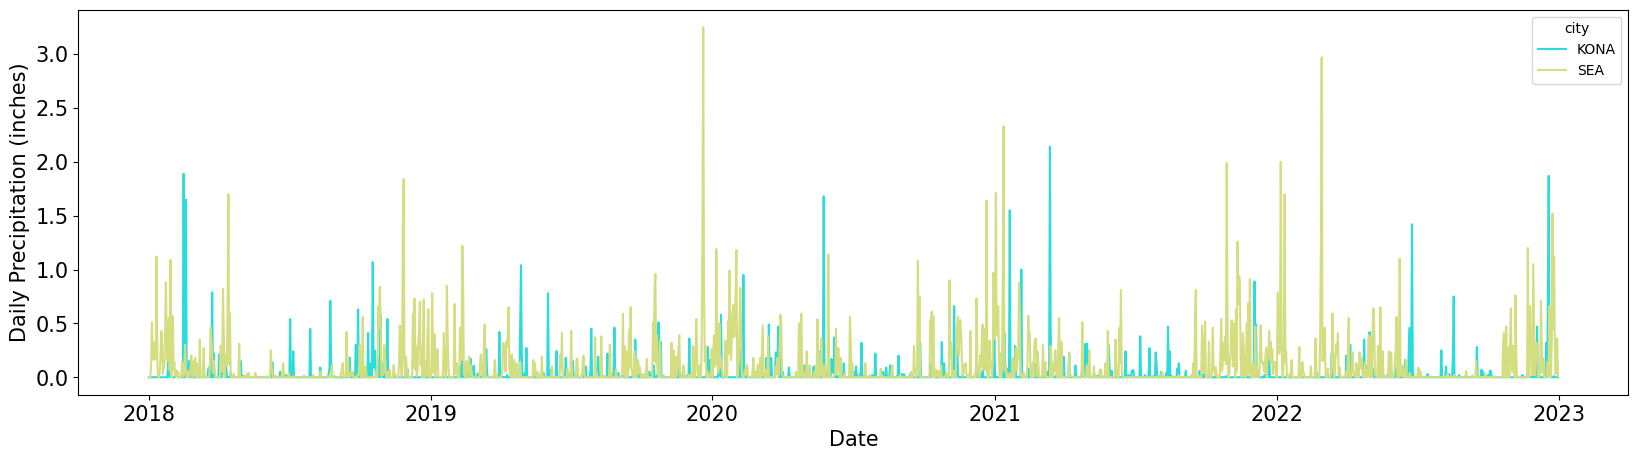

In [84]:
#Plot a figure for the cleaned and filled dataframe
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='date', y='precipitation', hue='city', palette= 'rainbow')
plt.ylabel('Daily Precipitation (inches)', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

The above line graph show the average precipitation by actual date rather than day of the year. This trend shows the differences in precipitation by year, including outliers.

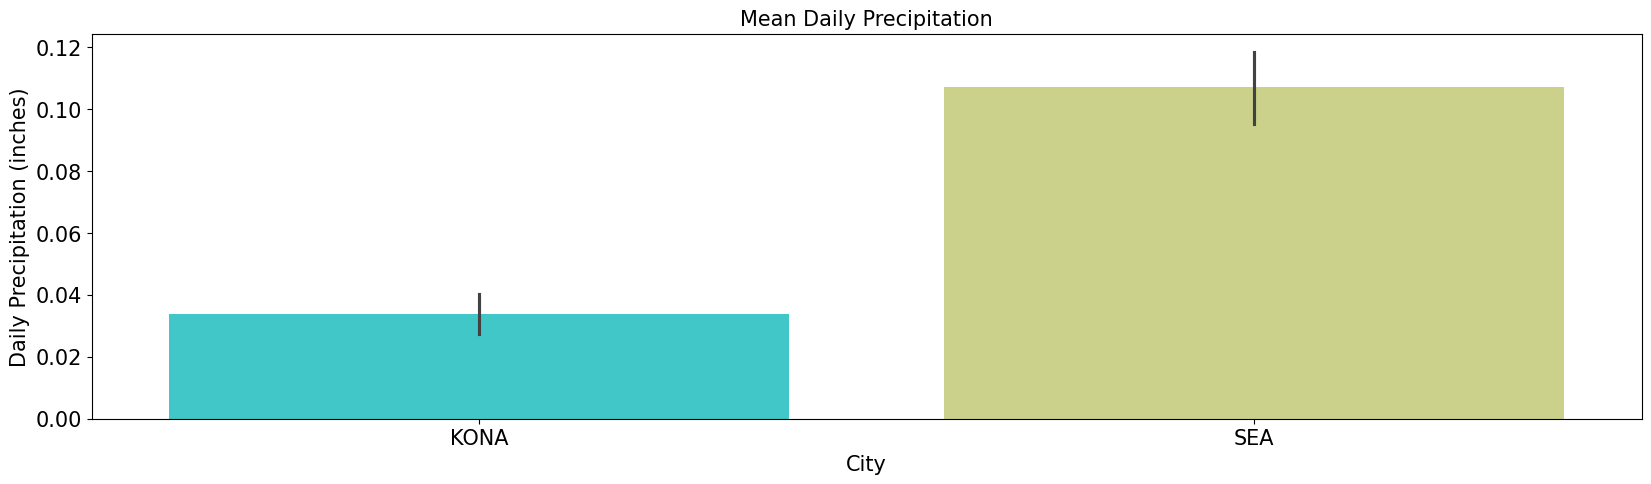

In [86]:
#Plot a figure for the proportion of daily precipitation per city
plt.figure(figsize=(20,5))
sns.barplot(data=df, x='city', y='precipitation', hue='city', palette='rainbow')
plt.ylabel('Daily Precipitation (inches)', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.title('Mean Daily Precipitation', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

This bar graph represents the amount of daily precipitation in each city, including rain and snowfall. The results of this graph show that Seattle receives at least twice as much yearly precipitaion as Kona, Hawaii.

In [ ]:
#Create a column for month in tidy dataframe
df['month'] = pd.DatetimeIndex(df['date']).month

#Verify column creation
df.head()

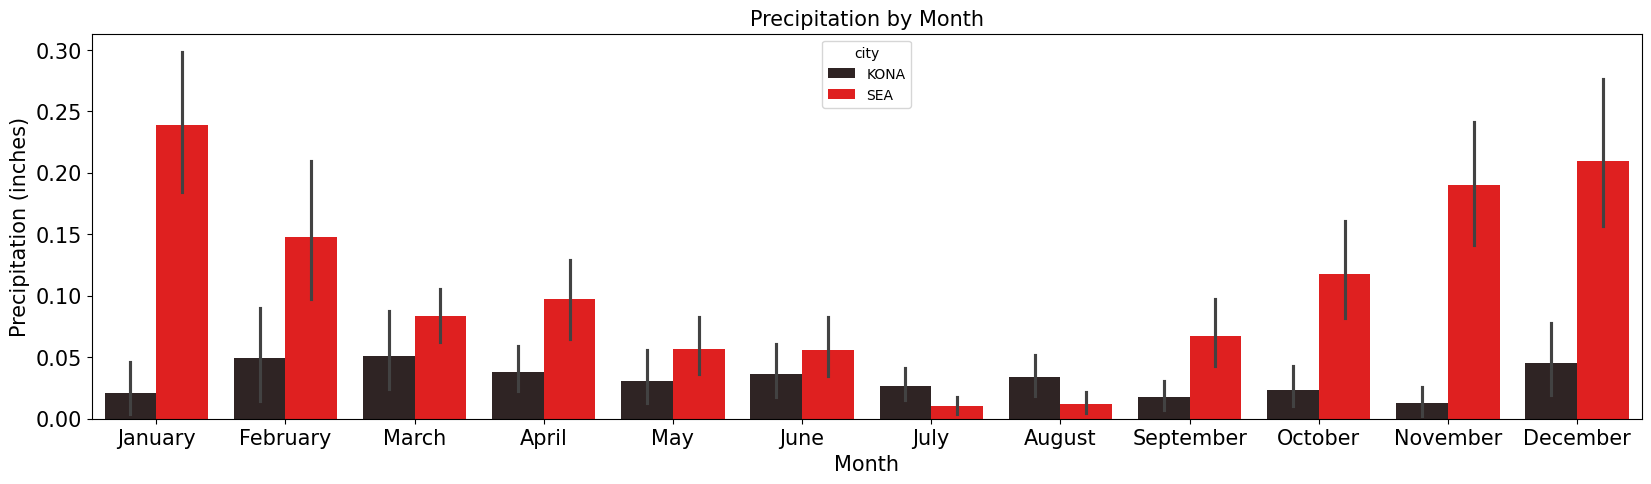

In [ ]:
#Plot a figure showing the precipitation by month per city
plt.figure(figsize=(20,5))
sns.barplot(data=df, x='month', y='precipitation', hue = 'city', palette= 'dark:red')
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.title('Precipitation by Month', fontsize = 15)
plt.tick_params(labelsize = 15)

#Link calendar to month column
import calendar
month_names = list(calendar.month_name[1:])
plt.xticks(ticks =range(12), labels=month_names)
plt.show()

This bar graph proves that the monthly precipitaion in Seattle is higher than in Kona, except for in July and August when Seattle is significantly drier than the winter months. Given the variation shown in the whisker plots, there are some months where Kona and Seattle could receive the exact same amount of rain, but this chart led me to question how much the snow data skews the amount of precipitation recorded in Seattle.

In [ ]:
#View mean precipitation by month
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
KONA 1           0.023677
     2           0.051716
     3           0.048594
     4           0.037320
     5           0.031897
     6           0.038200
     7           0.026955
     8           0.033548
     9           0.018613
     10          0.034348
     11          0.013013
     12          0.046761
SEA  1           0.238645
     2           0.147730
     3           0.083290
     4           0.097733
     5           0.056774
     6           0.055933
     7           0.010000
     8           0.012065
     9           0.067400
     10          0.118065
     11          0.189733
     12          0.212129

In [93]:
#Create boolean column to mark any days with precipitation
df['any_precipitation'] = df['precipitation'] > 0

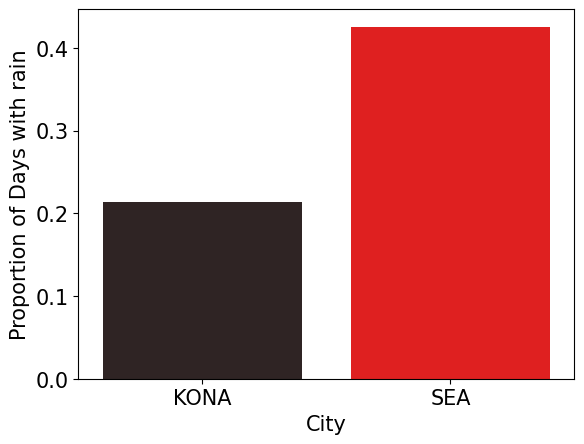

In [94]:
#Plot a figure of the percentage of days with some precipitation
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None, hue='city', palette='dark:red')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Proportion of Days with rain', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

This bar graph reflects the percentage of days in each city where any precipitation is recorded. Similarly to the annual rainfall visualization, this graph shows that Seattle has almost twice as many days with precipitation.

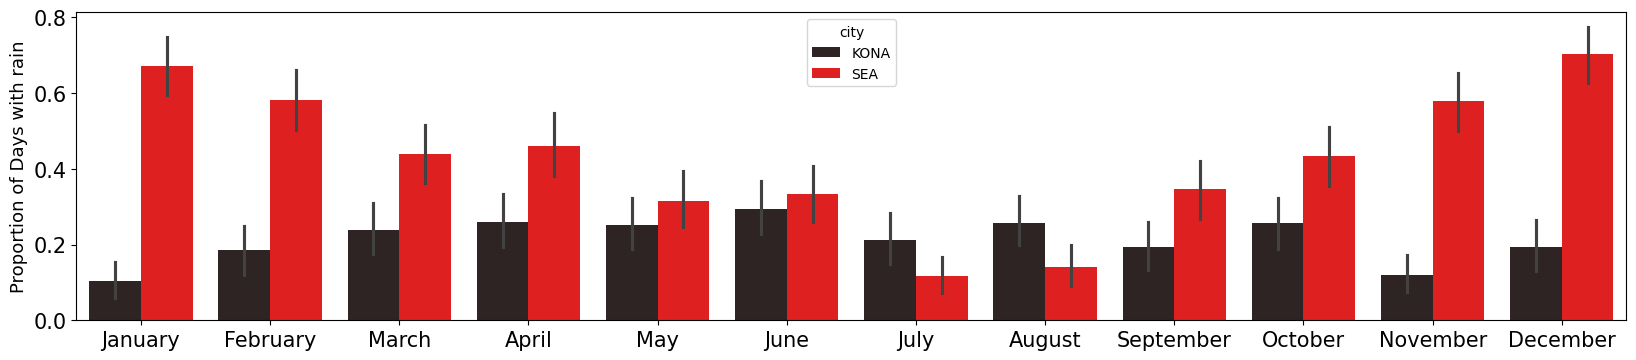

In [95]:
#Plot a figure of the percentage of days with rain by month
plt.figure(figsize=(20,4))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city', palette='dark:red')
plt.xlabel(None)
plt.ylabel('Proportion of Days with rain', fontsize = 13)
plt.xticks(ticks = range(12), labels=month_names)
plt.tick_params(labelsize = 15)
plt.show()

The above graph shows the same percentage of days with precipitation calculation but separated by month. This graph highlights the main differences between Seattle and Kona lie in the winter months that Seattle experiences.

In [96]:
#Import stats module
from scipy import stats

#Set significance level and a significant difference
sig_level = 0.05
sig_diff = np.zeros(12)

#Loop through months to find the difference level between the two cities
for month in range(1,13):
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    koa_data = df.loc[(df['city'] == 'KONA') & (df['month'] == month), 'precipitation']
    t_statistic, p_value = stats.ttest_ind(sea_data, koa_data, equal_var=False)
    if p_value < sig_level:
        sig_diff[month-1] = 1
    print(f"Month {month}: ")
    print(f"  t-statistic = {t_statistic:.2f}")
    print(f"  p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1: 
  t-statistic = 6.58
  p-value t test = 0.000
--------------------
Month 2: 
  t-statistic = 2.74
  p-value t test = 0.007
--------------------
Month 3: 
  t-statistic = 1.75
  p-value t test = 0.081
--------------------
Month 4: 
  t-statistic = 3.12
  p-value t test = 0.002
--------------------
Month 5: 
  t-statistic = 1.48
  p-value t test = 0.139
--------------------
Month 6: 
  t-statistic = 1.04
  p-value t test = 0.300
--------------------
Month 7: 
  t-statistic = -2.16
  p-value t test = 0.031
--------------------
Month 8: 
  t-statistic = -2.27
  p-value t test = 0.024
--------------------
Month 9: 
  t-statistic = 3.22
  p-value t test = 0.001
--------------------
Month 10: 
  t-statistic = 3.74
  p-value t test = 0.000
--------------------
Month 11: 
  t-statistic = 6.68
  p-value t test = 0.000
--------------------
Month 12: 
  t-statistic = 4.88
  p-value t test = 0.000
--------------------


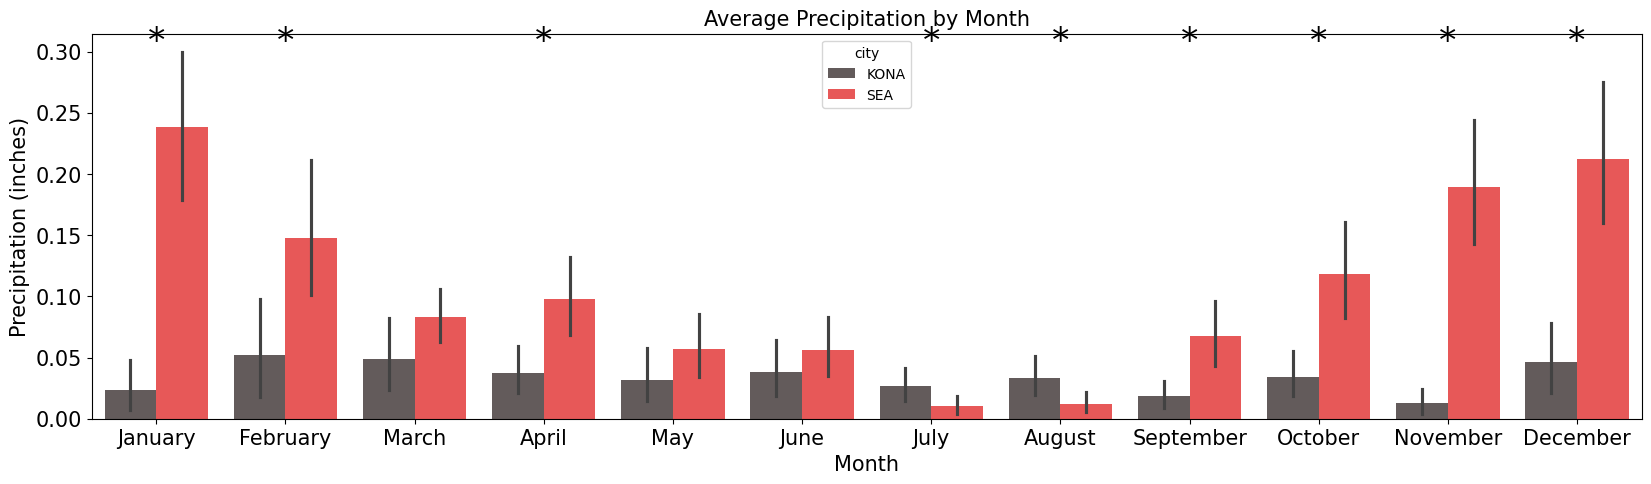

In [97]:
#Plot a figure with the monthly average precipitation by city, including a mark on months where there is a significant difference
plt.figure(figsize=(20,5))
sns.barplot(data=df, x='month', y='precipitation', hue = 'city', palette= 'dark:red', alpha = 0.75)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.title('Average Precipitation by Month', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
    if sig_diff[month] == 1:
        plt.text(month, 0.3, '*', ha='center', fontsize = 25)

plt.show()

This bar graph includes a calculation for severity of difference between the precipitation levels of the two cities. Each star marks a month that had a significant difference, and again we see that the winter months have the largest differences. In fact, the only months that are not considered significantly different are surprisingly March, May and June.

In [98]:
#Import z-test
from statsmodels.stats.proportion import proportions_ztest


#Loop through each month to preform a z-test to determine the severity of the difference in precipitation by city
for month in range(1,13):
    contigency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    days_with_precipitation = contigency_table[True]

    total_counts = contigency_table.sum(axis=1)

    zstat, p_value = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative = 'two-sided'
    )

    if p_value < sig_level:
        sig_diff[month-1] = 1    
    print(f"Month {month}: ")
    print(f"  z-statistic = {zstat:.2f}")
    print(f"  p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1: 
  z-statistic = -10.26
  p-value t test = 0.000
--------------------
Month 2: 
  z-statistic = -6.86
  p-value t test = 0.000
--------------------
Month 3: 
  z-statistic = -3.72
  p-value t test = 0.000
--------------------
Month 4: 
  z-statistic = -3.61
  p-value t test = 0.000
--------------------
Month 5: 
  z-statistic = -1.26
  p-value t test = 0.208
--------------------
Month 6: 
  z-statistic = -0.75
  p-value t test = 0.455
--------------------
Month 7: 
  z-statistic = 2.30
  p-value t test = 0.022
--------------------
Month 8: 
  z-statistic = 2.56
  p-value t test = 0.011
--------------------
Month 9: 
  z-statistic = -2.99
  p-value t test = 0.003
--------------------
Month 10: 
  z-statistic = -3.23
  p-value t test = 0.001
--------------------
Month 11: 
  z-statistic = -8.35
  p-value t test = 0.000
--------------------
Month 12: 
  z-statistic = -9.02
  p-value t test = 0.000
--------------------


In [164]:
#Create a column to calculate daily precipitation in Seattle without including snow
df_seattle['precip_no_snow'] = df_seattle['PRCP'] - df_seattle['SNOW']
df_seattle.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'precip_no_snow'],
      dtype='object')

In [171]:
#Merge the new precipitation values with Kona
df_nosnow = df_kona[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'precip_no_snow']], on = 'DATE', how = 'outer')

In [172]:
#Melt the dataframe to combine the columns and label city names
df_nosnow = pd.melt(df_nosnow, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')
city_map = {'PRCP':'KONA', 'precip_no_snow':'SEA'}
df_nosnow['city'] = df_nosnow['city'].replace(city_map)

In [ ]:
#Create a month column for visualization
df_nosnow['month'] = pd.DatetimeIndex(df_nosnow['DATE']).month

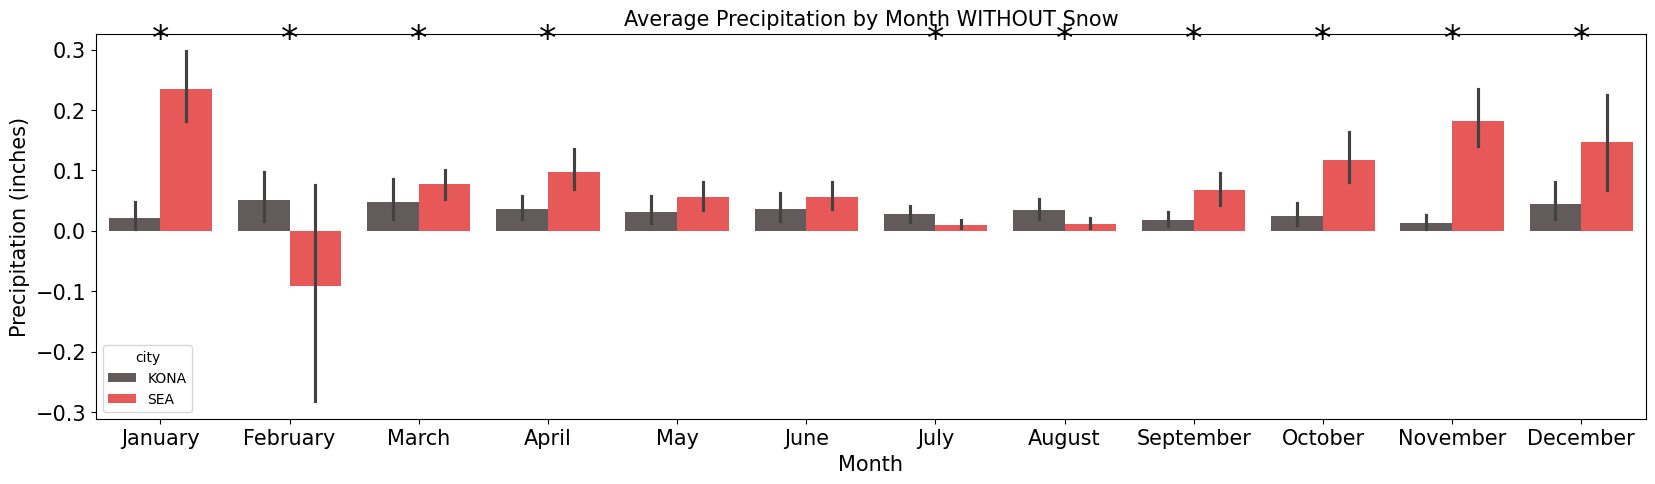

In [177]:
#Plot a figure with the monthly average precipitation by city WITHOUT snowfall values, including a mark on months where there is a significant difference
plt.figure(figsize=(20,5))
sns.barplot(data=df_nosnow, x='month', y='precipitation', hue = 'city', palette= 'dark:red', alpha = 0.75)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.title('Average Precipitation by Month WITHOUT Snow', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
    if sig_diff[month] == 1:
        plt.text(month, 0.3, '*', ha='center', fontsize = 25)

plt.show()

This graph was generated to satisfy a curiousity - is the majority of the difference in precipitation explained by the snowfall in Seattle? A metric taken by subtracting SNOW (Snowfall) from PRCP (Precipitation) was created to observe how the data would change. Without the snow data included, the months without a significant difference changes to May and June only. However, the result of a negative number prompts the review of Seattle's SNOW metric directly.

In [178]:
#Merge the snow precipitation values with Kona
df_snow = df_kona[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'SNOW']], on = 'DATE', how = 'outer')
df_snow = pd.melt(df_snow, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')
city_map = {'PRCP':'KONA', 'SNOW':'SEA'}
df_snow['city'] = df_snow['city'].replace(city_map)

In [ ]:
#Create a month column for visualization
df_snow['month'] = pd.DatetimeIndex(df_snow['DATE']).month

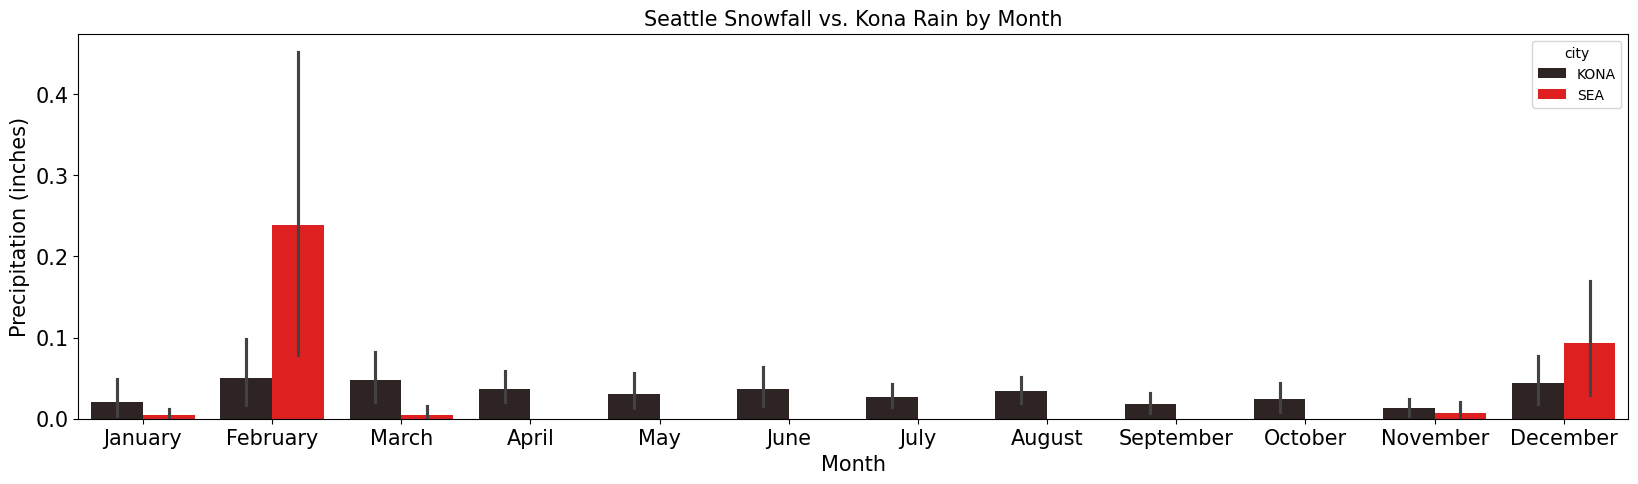

In [183]:
#Plot a figure for the snowfall comparison
plt.figure(figsize=(20,5))
sns.barplot(data=df_snow, x='month', y='precipitation', hue = 'city', palette= 'dark:red')
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.title('Seattle Snowfall vs. Kona Rain by Month', fontsize = 15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize = 15)

This graph shows the other half of the previous - the snowfall data alone in red compared to Kona's rainfall data. With these assumptions tested, the final analysis can conclude that Seattle receives significantly more precipitation than Kona, Hawaii which can only by explained by snow for the month of February.